## Plot max projections of annotation at ful resolution 
Best use for visualization when using the points resampled at 1um distances

In [2]:
import numpy as np
import pandas as pd

import Neuron_analysis as na
from Neuron_analysis import *

import math


import matplotlib.pyplot as plt


In [52]:
headings,annotations= na.analysis_tools.read_eswc()

In [53]:
mousename= 'GF243'
annotype=''

#note that the rotation is -30 for al066 and al092 since they were imaged from back to front

outname= f'M:\\analysis\\Yanqi_Liu\\For_anatomy_manuscript\Results\\full_dendrite_4sup\\'

In [54]:
axons=pd.DataFrame(annotations, columns=headings)

In [55]:
x= pd.to_numeric(axons['x']).round()
y= pd.to_numeric(axons['y']).round()
z= pd.to_numeric(axons['z']).round()

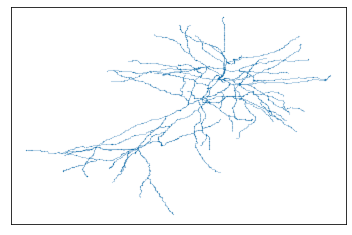

In [56]:
#plt.scatter(x[::5], y[::5],s=0.01) plots every 5th points to save memory
plt.scatter(x, y,s=0.01)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig(outname+f"{mousename}_c_d{annotype}.svg", format='svg')
plt.show()
# plt.show should come after save fig, otherwise it saves a blank one (since plt.show clears and creates an empty figure)

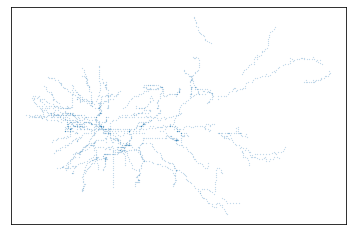

In [9]:
plt.scatter(x[::5], z[::5],s=0.01)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig(outname+f"{mousename}_h_d{annotype}.svg", format='svg')
plt.show()
#horizontal view

In [10]:
def rotate(x,y,xo,yo,degrees): #rotate x,y around xo,yo by x degrees
    theta = np.deg2rad(degrees) # convert degrees to rad
    xr=math.cos(theta)*(x-xo)-math.sin(theta)*(y-yo)   + xo
    yr=math.sin(theta)*(x-xo)+math.cos(theta)*(y-yo)  + yo
    return [xr,yr]

In [11]:
list_xy= list(zip(x,y))
list_xy[1]

(3495.0, 2673.0)

In [12]:
rot_x=[]
rot_y=[]
for i in list_xy:
    x= i[0]
    y= i[1]
    newx,newy= rotate(x,y,0,0,30)
    rot_x.append(newx)
    rot_y.append(newy)
    
    

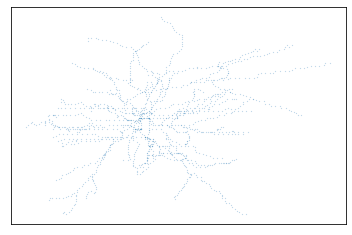

In [13]:
plt.scatter(rot_x[::5], z[::5],s=0.01)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig(outname+f"{mousename}_bf_d{annotype}.svg", format='svg')
plt.show()